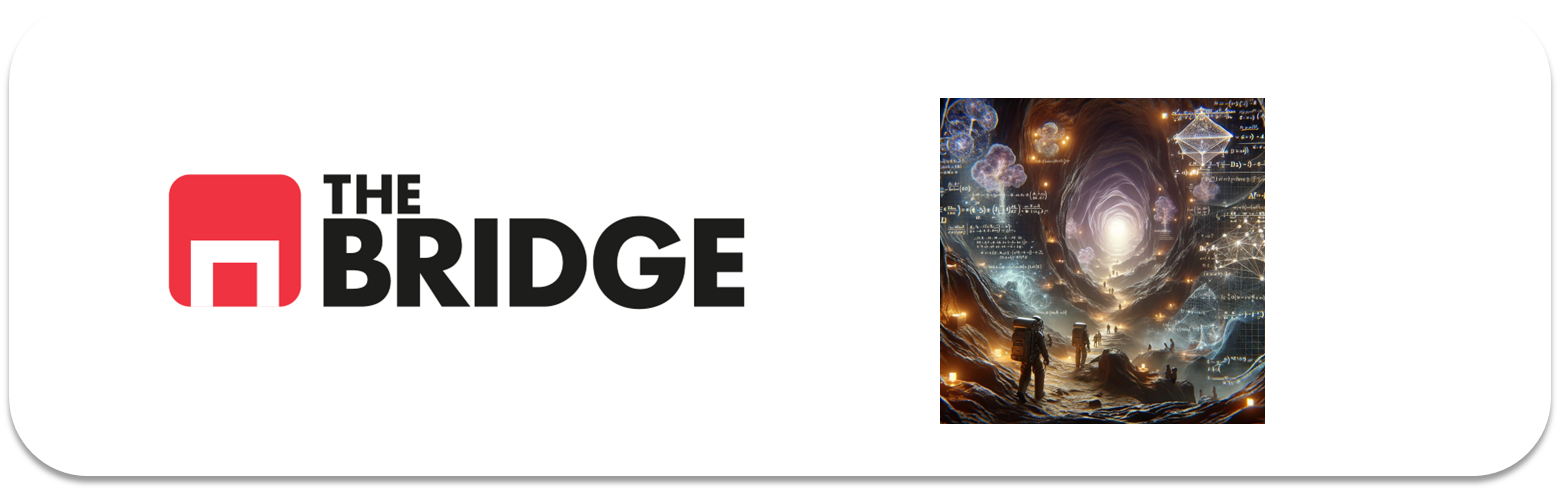

## PRACTICA OBLIGATORIA: **Introducción Deep Learning**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de modelado del dataset del titanic empleando y comparando dos modelos diferentes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [153]:
import pandas as pd
import numpy as np
import Toolbox_datascience as td

### Descripción y objetivo

El objetivo de la práctica es crear un modelo DL y compararlo con un modelo Random Forest para el dataset de titanic los dos con el mismo objetivo, predecir la supervivencia de un pasajero.  Se pide:  
1. Desarrollar el proceso de ML hasta crear los dos modelos DL y Random Forest. El primero debe tener una topología MLP (es decir una red densa) con un máximo de 3 capas ocultas y debes emplear sklearn para crearlo. No es necesario hacer una análisis/seleccion exahustivo. Escoge una métrica acorde al tipo de target del problema. 

2. Ambos modelos deben tener sus hiperparámetros optimizados, mediante GridSearch. Para ello: utiliza el grid de parámetros que creas conveniente para Random Forest y para el modelo DL, utiliza un grid con los hiperparámetros siguientes:'hidden_layer_sizes','activation', 'solver','alpha' y 'learning_rate'. Para los rangos del grid del modelo de DL guíate por lo visto en el workout y por los posibles valores que se indican en la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier). Prueba por lo menos una topología con una sola capa oculta y otra con más de una capa oculta.   
NOTA: Incluye los valores por defecto de los hiperparámetros escogidos en cada caso dentro del grid de hiperparámetros. 
  

3. Compara los modelos respecto a sus métricas medias de accuracy, precision, recall y tiempos de entrenamiento (para ello tendrás que realizar un entrenamiento a parte del mejor modelo obtenido en la optimización de hiperparámetros) y decide cuál te quedarías argumentándolo.    

4. Para el mejor modelo DL obtenido, muestra su clasification report, y la matriz de confusión comentando el resultado.


In [154]:
df = pd.read_csv('./data/titanic.csv')
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [156]:
df.drop('deck',axis=1,inplace=True)
df.dropna(axis=0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     712 non-null    int64  
 1   pclass       712 non-null    int64  
 2   sex          712 non-null    object 
 3   age          712 non-null    float64
 4   sibsp        712 non-null    int64  
 5   parch        712 non-null    int64  
 6   fare         712 non-null    float64
 7   embarked     712 non-null    object 
 8   class        712 non-null    object 
 9   who          712 non-null    object 
 10  adult_male   712 non-null    bool   
 11  embark_town  712 non-null    object 
 12  alive        712 non-null    object 
 13  alone        712 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(6)
memory usage: 73.7+ KB


In [157]:
target = 'survived'

In [158]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(target, axis=1), df[target], test_size=0.2, random_state=42)

In [159]:
features_cat = X_train.select_dtypes(include=['object','bool']).columns
features_cat

Index(['sex', 'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

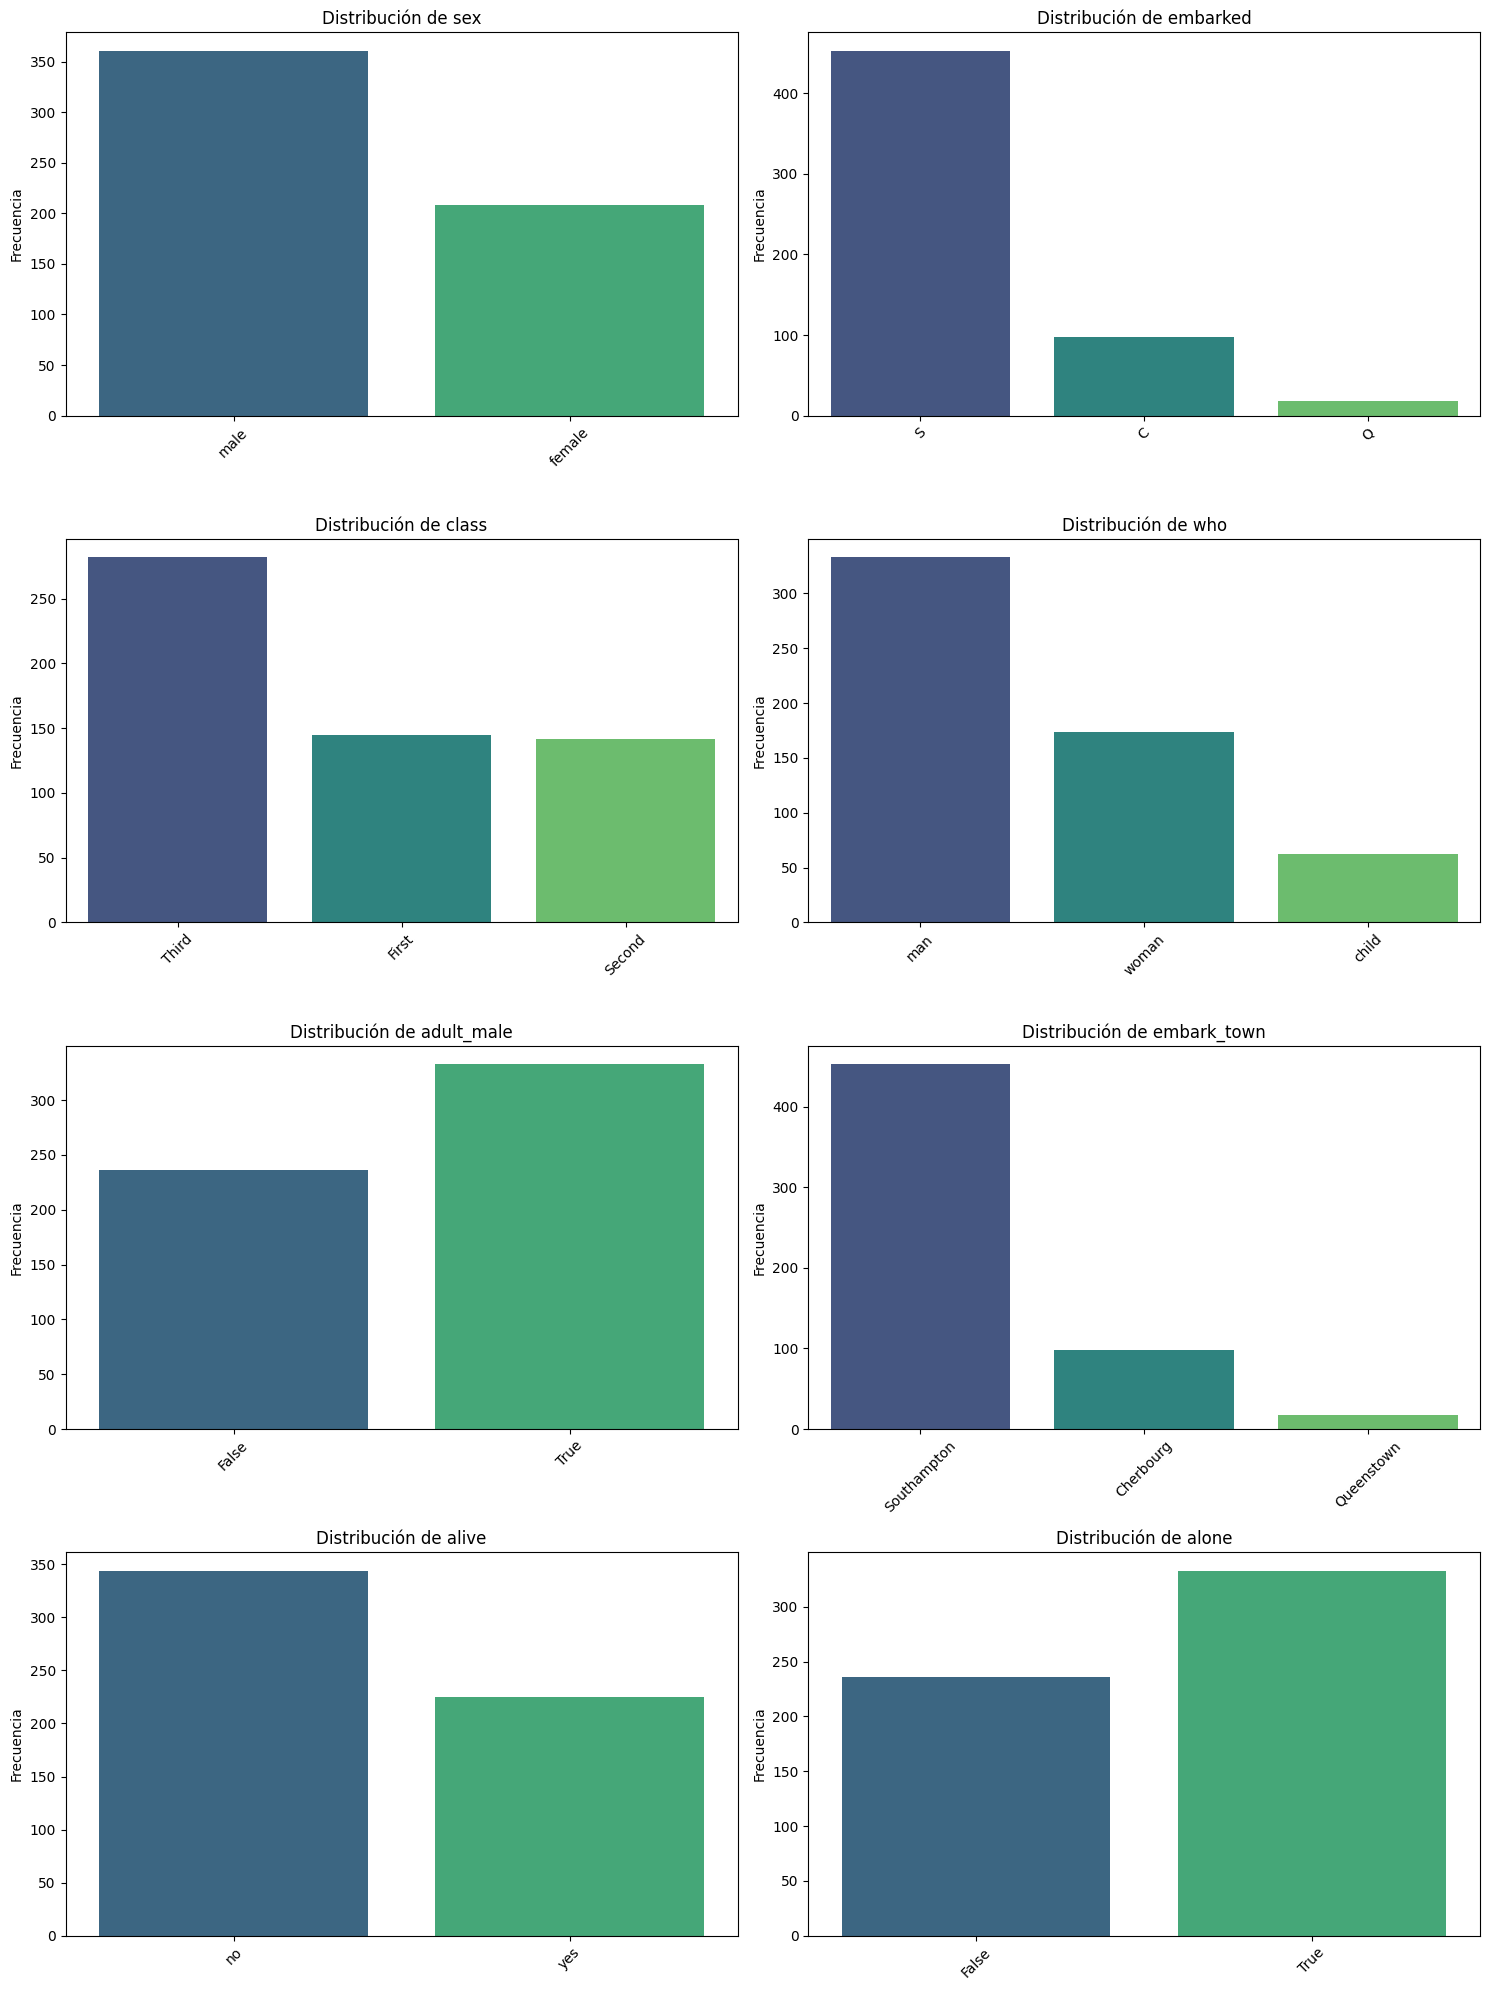

In [160]:
td.pinta_distribucion_categoricas(X_train,features_cat)

In [161]:
X_train.drop(['alive', 'embark_town','class'], axis=1, inplace=True)
X_test.drop(['alive', 'embark_town','class'], axis=1, inplace=True)
X_train.info() 


<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 472 to 131
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      569 non-null    int64  
 1   sex         569 non-null    object 
 2   age         569 non-null    float64
 3   sibsp       569 non-null    int64  
 4   parch       569 non-null    int64  
 5   fare        569 non-null    float64
 6   embarked    569 non-null    object 
 7   who         569 non-null    object 
 8   adult_male  569 non-null    bool   
 9   alone       569 non-null    bool   
dtypes: bool(2), float64(2), int64(3), object(3)
memory usage: 41.1+ KB


In [162]:
features_num = ['fare','age']
features_num

['fare', 'age']

c:\Users\rodri\Git_Repositories\ONLINE_DS_THEBRIDGE_ROD\Sprint_16\Unidad_01\Practica_Obligatoria\Toolbox_datascience.py:433: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, bins=bins, kde=kde, ax=ax, hue=df[hue] if hue else None, palette='coolwarm')
c:\Users\rodri\Git_Repositories\ONLINE_DS_THEBRIDGE_ROD\Sprint_16\Unidad_01\Practica_Obligatoria\Toolbox_datascience.py:433: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, bins=bins, kde=kde, ax=ax, hue=df[hue] if hue else None, palette='coolwarm')


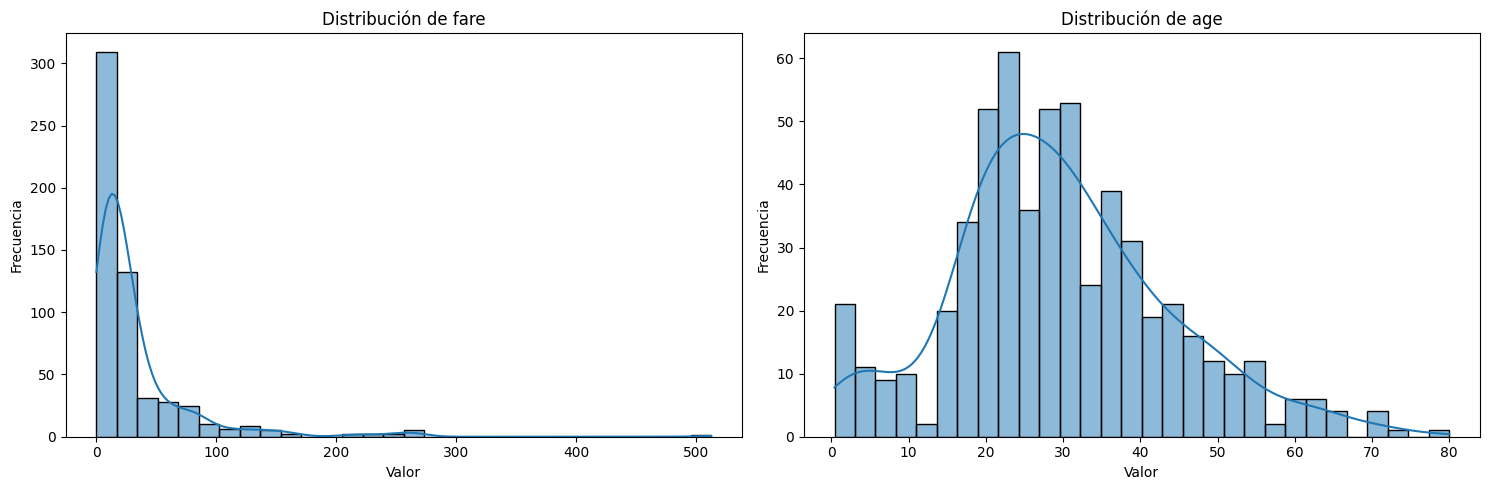

In [163]:
td.pinta_distribucion_numericas(X_train,features_num)

In [164]:

X_train_log = X_train.copy()
X_test_log = X_test.copy()

X_train_log[features_num] = np.log1p(X_train[features_num])
X_test_log[features_num] = np.log1p(X_test[features_num])


In [165]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Ajustamos el scaler solo con las columnas numéricas
scaler.fit(X_train_log[features_num], X_test_log[features_num])

# Creamos copias de los DataFrames originales
X_train_scaled = X_train_log.copy()
X_test_scaled = X_test_log.copy()

# Aplicamos la transformación solo a las columnas numéricas
X_train_scaled[features_num] = scaler.transform(X_train_log[features_num])
X_test_scaled[features_num] = scaler.transform(X_test_log[features_num])



c:\Users\rodri\Git_Repositories\ONLINE_DS_THEBRIDGE_ROD\Sprint_16\Unidad_01\Practica_Obligatoria\Toolbox_datascience.py:433: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, bins=bins, kde=kde, ax=ax, hue=df[hue] if hue else None, palette='coolwarm')
c:\Users\rodri\Git_Repositories\ONLINE_DS_THEBRIDGE_ROD\Sprint_16\Unidad_01\Practica_Obligatoria\Toolbox_datascience.py:433: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, bins=bins, kde=kde, ax=ax, hue=df[hue] if hue else None, palette='coolwarm')


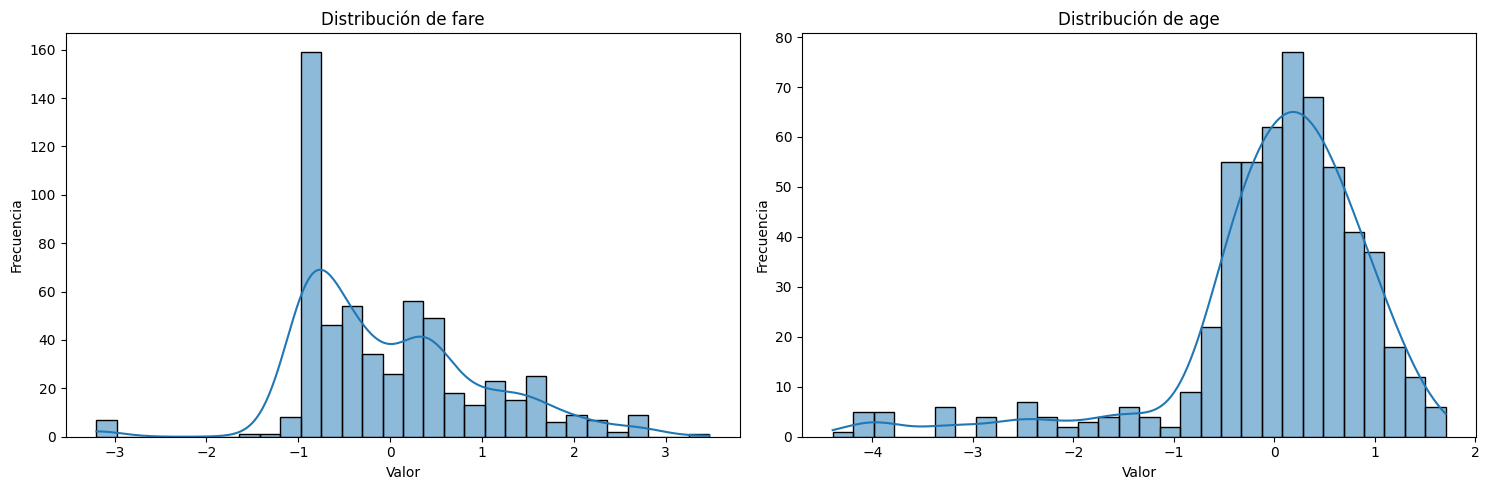

In [166]:
td.pinta_distribucion_numericas(X_train_scaled,features_num)

In [167]:
import pandas as pd

# Identificar columnas categóricas (tipo object)
features_cat = X_train_scaled.select_dtypes(include=['object']).columns

# Aplicar One-Hot Encoding solo a esas columnas
X_train_encoded = pd.get_dummies(X_train_scaled, columns=features_cat, drop_first=True)
X_test_encoded = pd.get_dummies(X_test_scaled, columns=features_cat, drop_first=True)

# # Convertir booleanas a int (opcional)
# X_train_encoded[['adult_male', 'alone']] = X_train_encoded[['adult_male', 'alone']].astype(int)
# X_test_encoded[['adult_male', 'alone']] = X_test_encoded[['adult_male', 'alone']].astype(int)

# Ver las primeras filas
X_train_encoded.head()


,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,embarked_Q,embarked_S,who_man,who_woman
472,2,0.395367,1,2,0.393579,False,False,False,False,True,False,True
432,2,0.749603,1,0,0.326427,False,False,False,False,True,False,True
666,2,-0.009287,0,0,-0.375855,True,True,True,False,True,True,False
30,1,0.677760,0,0,0.392492,True,True,True,False,False,True,False
291,1,-0.405041,1,0,1.638235,False,False,False,False,False,False,True


In [168]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf = RandomForestClassifier(n_estimators=100,random_state=42)

rf.fit(X_train_encoded,y_train)
y_pred = rf.predict(X_test_encoded)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Clasificación report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7622377622377622
Clasificación report:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79        80
           1       0.74      0.71      0.73        63

    accuracy                           0.76       143
   macro avg       0.76      0.76      0.76       143
weighted avg       0.76      0.76      0.76       143



In [171]:
from sklearn.neural_network import MLPClassifier # TB existe. No se usa en este ejemplo


mlp = MLPClassifier(max_iter=100,
                   activation='tanh',
                   hidden_layer_sizes = (150, 150, 150))

mlp.fit(X_train_encoded, y_train)
y_pred = mlp.predict(X_test_encoded)

print(mlp.score(X_train_encoded, y_train))
print(mlp.score(X_test_encoded, y_test))



print("Reporte de clasificación:\n", classification_report(y_test, y_pred))


0.8523725834797891
0.8181818181818182
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.79      0.93      0.85        80
           1       0.88      0.68      0.77        63

    accuracy                           0.82       143
   macro avg       0.83      0.80      0.81       143
weighted avg       0.83      0.82      0.81       143



c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [172]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definir el modelo base
rf = RandomForestClassifier(random_state=42)

# Definir el grid de hiperparámetros
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Incluye el valor por defecto (100)
    'max_depth': [None, 10, 20, 30],  # Incluye None (valor por defecto)
    'min_samples_split': [2, 5, 10],  # 2 es el valor por defecto
    'min_samples_leaf': [1, 2, 4],  # 1 es el valor por defecto
    'max_features': ['sqrt', 'log2', None]  # None usa todas las features
}

# Configurar GridSearchCV
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, n_jobs=-1, scoring='accuracy', verbose=1)
grid_search_rf.fit(X_train_encoded, y_train)

# Mejor modelo y mejor puntuación
print("Mejores hiperparámetros para Random Forest:", grid_search_rf.best_params_)
print("Mejor precisión obtenida:", grid_search_rf.best_score_)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Mejores hiperparámetros para Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Mejor precisión obtenida: 0.8278062412668842


In [175]:
from sklearn.neural_network import MLPClassifier

# Definir el modelo base
mlp = MLPClassifier(max_iter=500, random_state=42)

# Definir el grid de hiperparámetros
param_grid_mlp = {
    'hidden_layer_sizes': [(50,50,50), (100,100,100), (150, 150,150), (200, 200,200)],  # Una capa oculta y múltiples capas ocultas
    'activation': ['relu', 'tanh', 'logistic'],  # Funciones de activación
    'solver': ['adam', 'sgd', 'lbfgs'],  # Algoritmos de optimización
    'alpha': [0.0001, 0.001, 0.01],  # Regularización L2
    'learning_rate': ['constant', 'adaptive']  # Estrategia de learning rate
}

# Configurar GridSearchCV
grid_search_mlp = GridSearchCV(mlp, param_grid_mlp, cv=5, n_jobs=-1, scoring='accuracy', verbose=1)
grid_search_mlp.fit(X_train_encoded, y_train)

# Mejor modelo y mejor puntuación
print("Mejores hiperparámetros para MLPClassifier:", grid_search_mlp.best_params_)
print("Mejor precisión obtenida:", grid_search_mlp.best_score_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Mejores hiperparámetros para MLPClassifier: {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (150, 150, 150), 'learning_rate': 'constant', 'solver': 'adam'}
Mejor precisión obtenida: 0.8277596646483465


In [176]:
grid_search_mlp.predict(X_test_encoded)
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.79      0.93      0.85        80
           1       0.88      0.68      0.77        63

    accuracy                           0.82       143
   macro avg       0.83      0.80      0.81       143
weighted avg       0.83      0.82      0.81       143



In [177]:
grid_search_rf.predict(X_test_encoded)
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.79      0.93      0.85        80
           1       0.88      0.68      0.77        63

    accuracy                           0.82       143
   macro avg       0.83      0.80      0.81       143
weighted avg       0.83      0.82      0.81       143

